# ATP6V0C
[early-onset epilepsy-3 with or without developmental delay (EPEO3)](https://omim.org/entry/620465) is caused by heterozygous mutation in the ATP6V0C gene.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.1


### ATP6V0C
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for ATP6V0C.

In [2]:
gene_symbol = 'ATP6V0C'
mane_tx_id = 'NM_001694.4'
mane_protein_id = 'NP_001685.1' # V-type proton ATPase 16 kDa proteolipid subunit c [Homo sapiens]

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.23') as ps:
        phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc_results = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)

qc_results.summarize()

Individuals Processed: 100%|██████████| 31/31 [00:38<00:00,  1.25s/individuals]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
21,Global developmental delay
18,Bilateral tonic-clonic seizure
15,EEG abnormality
12,Febrile seizure (within the age range of 3 months to 6 years)
12,Delayed speech and language development
11,Motor delay
10,Autistic behavior
8,Myoclonic seizure
7,Atonic seizure
6,Hypotonia


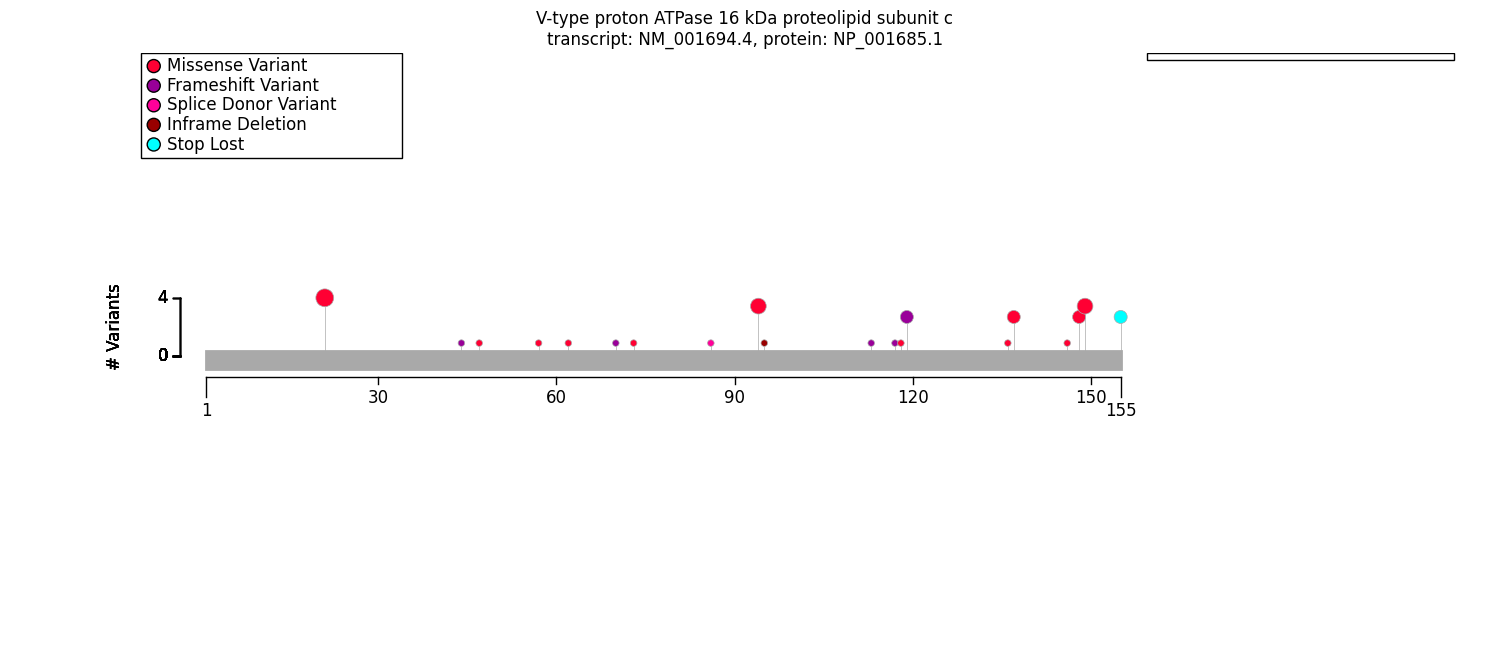

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)


ATP6V0C_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
ATP6V0C_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.model.genome import Region
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import protein_region
from gpsea.view import MtcStatsViewer


n_term = protein_region(region=Region(0,100), tx_id=mane_tx_id)
n_term_clf = monoallelic_classifier(a_predicate=n_term, 
                                         b_predicate=~ n_term, 
                                         a_label="1-100", 
                                         b_label="100+")
nterm_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=n_term_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(nterm_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,62
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,57
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,130


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=nterm_result)

Allele group                                        1-100           100+  \
                                                    Count Percent  Count   
Intellectual disability, mild [HP:0001256]           0/11      0%   4/10   
Febrile seizure (within the age range of 3 mont...   8/15     53%   4/16   
Myoclonic seizure [HP:0032794]                       6/15     40%   2/15   
Global developmental delay [HP:0001263]              8/14     57%  13/16   
Absent speech [HP:0001344]                            3/7     43%   1/11   
Intellectual disability, severe [HP:0010864]          3/7     43%    1/9   
EEG abnormality [HP:0002353]                         6/10     60%   9/11   
Hypotonia [HP:0001252]                                3/7     43%   3/11   
Seizure [HP:0001250]                                13/13    100%  14/14   
Motor seizure [HP:0020219]                            7/7    100%    7/7   
Bilateral tonic-clonic seizure [HP:0002069]           7/7    100%  12/12   
Neurodevelopmental delay [HP:0012758]                 8/8    100%  13/13   
Neurodevelopmental abnormality [HP:0012759]         10/10    100%  14/14   
Delayed speech and language development [HP:000...    5/5    100%  11/11   
Abnormal communication [HP:0034434]                   5/5    100%  11/11   
Intellectual disability [HP:0001249]                  6/6    100%  11/11   
Morphological central nervous system abnormalit...    5/5    100%    8/8   
Abnormality of central nervous system electroph...    6/6    100%    9/9   
Motor delay [HP:0001270]                              3/3    100%  11/12   
Autistic behavior [HP:0000729]                        4/7     57%   6/10   

Allele group                                                                   \
                                                   Percent Corrected p values   
Intellectual disability, mild [HP:0001256]             40%           0.701754   
Febrile seizure (within the age range of 3 mont...     25%           0.871795   
Myoclonic seizure [HP:0032794]                         13%           0.871795   
Global developmental delay [HP:0001263]                81%           0.871795   
Absent speech [HP:0001344]                              9%           0.871795   
Intellectual disability, severe [HP:0010864]           11%           0.871795   
EEG abnormality [HP:0002353]                           82%           1.000000   
Hypotonia [HP:0001252]                                 27%           1.000000   
Seizure [HP:0001250]                                  100%           1.000000   
Motor seizure [HP:0020219]                            100%           1.000000   
Bilateral tonic-clonic seizure [HP:0002069]           100%           1.000000   
Neurodevelopmental delay [HP:0012758]                 100%           1.000000   
Neurodevelopmental abnormality [HP:0012759]           100%           1.000000   
Delayed speech and language development [HP:000...    100%           1.000000   
Abnormal communication [HP:0034434]                   100%           1.000000   
Intellectual disability [HP:0001249]                  100%           1.000000   
Morphological central nervous system abnormalit...    100%           1.000000   
Abnormality of central nervous system electroph...    100%           1.000000   
Motor delay [HP:0001270]                               92%           1.000000   
Autistic behavior [HP:0000729]                         60%           1.000000   

Allele group                                                  
                                                    p values  
Intellectual disability, mild [HP:0001256]          0.035088  
Febrile seizure (within the age range of 3 mont...  0.148884  
Myoclonic seizure [HP:0032794]                      0.214759  
Global developmental delay [HP:0001263]             0.235982  
Absent speech [HP:0001344]                          0.245098  
Intellectual disability, severe [HP:0010864]        0.261538  
EEG abnormality [HP:0002353]            

In [9]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect

missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
missense_clf= monoallelic_classifier(a_predicate=missense,
                                           b_predicate=~missense,
                                           a_label="missense",
                                           b_label="other"
                                           )
missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       missense          other  \
                                                      Count Percent  Count   
Developmental regression [HP:0002376]                  0/11      0%    3/4   
Global developmental delay [HP:0001263]               16/21     76%    5/9   
Febrile seizure (within the age range of 3 mont...     7/21     33%   5/10   
Hypotonia [HP:0001252]                                 6/15     40%    0/3   
EEG abnormality [HP:0002353]                          12/16     75%    3/5   
Seizure [HP:0001250]                                  17/17    100%  10/10   
Motor seizure [HP:0020219]                              8/8    100%    6/6   
Bilateral tonic-clonic seizure [HP:0002069]           11/11    100%    8/8   
Neurodevelopmental delay [HP:0012758]                 16/16    100%    5/5   
Neurodevelopmental abnormality [HP:0012759]           17/17    100%    7/7   
Delayed speech and language development [HP:000...    13/13    100%    3/3   
Abnormal communication [HP:0034434]                   13/13    100%    3/3   
Intellectual disability [HP:0001249]                  11/11    100%    6/6   
Morphological central nervous system abnormalit...    11/11    100%    2/2   
Abnormality of central nervous system electroph...    12/12    100%    3/3   
Motor delay [HP:0001270]                              11/12     92%    3/3   
Autistic behavior [HP:0000729]                         8/14     57%    2/3   

Allele group                                                                   \
                                                   Percent Corrected p values   
Developmental regression [HP:0002376]                  75%           0.149451   
Global developmental delay [HP:0001263]                56%           1.000000   
Febrile seizure (within the age range of 3 mont...     50%           1.000000   
Hypotonia [HP:0001252]                                  0%           1.000000   
EEG abnormality [HP:0002353]                           60%           1.000000   
Seizure [HP:0001250]                                  100%           1.000000   
Motor seizure [HP:0020219]                            100%           1.000000   
Bilateral tonic-clonic seizure [HP:0002069]           100%           1.000000   
Neurodevelopmental delay [HP:0012758]                 100%           1.000000   
Neurodevelopmental abnormality [HP:0012759]           100%           1.000000   
Delayed speech and language development [HP:000...    100%           1.000000   
Abnormal communication [HP:0034434]                   100%           1.000000   
Intellectual disability [HP:0001249]                  100%           1.000000   
Morphological central nervous system abnormalit...    100%           1.000000   
Abnormality of central nervous system electroph...    100%           1.000000   
Motor delay [HP:0001270]                              100%           1.000000   
Autistic behavior [HP:0000729]                         67%           1.000000   

Allele group                                                  
                                                    p values  
Developmental regression [HP:0002376]               0.008791  
Global developmental delay [HP:0001263]             0.388819  
Febrile seizure (within the age range of 3 mont...  0.447249  
Hypotonia [HP:0001252]                              0.514706  
EEG abnormality [HP:0002353]                        0.597523  
Seizure [HP:0001250]                                1.000000  
Motor seizure [HP:0020219]                          1.000000  
Bilateral tonic-clonic seizure [HP:0002069]         1.000000  
Neurodevelopmental delay [HP:0012758]               1.000000  
Neurodevelopmental abnormality [HP:0012759]         1.000000  
Delayed speech and language development [HP:000...  1.000000  
Abnormal communication [HP:0034434]                 1.000000  
Intellectual disability [HP:0001249]                1.000000  
Morphological central nervous sy

In [10]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
EEG abnormality [HP:0002353]                          3/7     43%  12/14   
Developmental regression [HP:0002376]                 2/4     50%   1/11   
Global developmental delay [HP:0001263]              7/12     58%  14/18   
Febrile seizure (within the age range of 3 mont...   6/12     50%   6/19   
Seizure [HP:0001250]                                11/11    100%  16/16   
Motor seizure [HP:0020219]                            5/5    100%    9/9   
Bilateral tonic-clonic seizure [HP:0002069]           7/7    100%  12/12   
Neurodevelopmental delay [HP:0012758]                 7/7    100%  14/14   
Neurodevelopmental abnormality [HP:0012759]           8/8    100%  16/16   
Delayed speech and language development [HP:000...    5/5    100%  11/11   
Abnormal communication [HP:0034434]                   5/5    100%  11/11   
Intellectual disability [HP:0001249]                  4/4    100%  13/13   
Morphological central nervous system abnormalit...    3/3    100%  10/10   
Abnormality of central nervous system electroph...    3/3    100%  12/12   
Motor delay [HP:0001270]                              4/4    100%  10/11   
Autistic behavior [HP:0000729]                        3/5     60%   7/12   
Hypotonia [HP:0001252]                                2/5     40%   4/13   

Sex                                                                            \
                                                   Percent Corrected p values   
EEG abnormality [HP:0002353]                           86%                1.0   
Developmental regression [HP:0002376]                   9%                1.0   
Global developmental delay [HP:0001263]                78%                1.0   
Febrile seizure (within the age range of 3 mont...     32%                1.0   
Seizure [HP:0001250]                                  100%                1.0   
Motor seizure [HP:0020219]                            100%                1.0   
Bilateral tonic-clonic seizure [HP:0002069]           100%                1.0   
Neurodevelopmental delay [HP:0012758]                 100%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Delayed speech and language development [HP:000...    100%                1.0   
Abnormal communication [HP:0034434]                   100%                1.0   
Intellectual disability [HP:0001249]                  100%                1.0   
Morphological central nervous system abnormalit...    100%                1.0   
Abnormality of central nervous system electroph...    100%                1.0   
Motor delay [HP:0001270]                               91%                1.0   
Autistic behavior [HP:0000729]                         58%                1.0   
Hypotonia [HP:0001252]                                 31%                1.0   

Sex                                                           
                                                    p values  
EEG abnormality [HP:0002353]                        0.119582  
Developmental regression [HP:0002376]               0.153846  
Global developmental delay [HP:0001263]             0.418106  
Febrile seizure (within the age range of 3 mont...  0.452097  
Seizure [HP:0001250]                                1.000000  
Motor seizure [HP:0020219]                          1.000000  
Bilateral tonic-clonic seizure [HP:0002069]         1.000000  
Neurodevelopmental delay [HP:0012758]               1.000000  
Neurodevelopmental abnormality [HP:0012759]         1.000000  
Delayed speech and language development [HP:000...  1.000000  
Abnormal communication [HP:0034434]                 1.000000  
Intellectual disability [HP:0001249]                1.000000  
Morphological central nervous system abnormalit...  1.000000  
Abnormality of central nervous system electroph...  1.000000  
Motor d

In [12]:
from gpsea.analysis.temporal.endpoint import disease_onset
from gpsea.analysis.temporal.stats import LogRankTest
from gpsea.analysis.temporal import SurvivalAnalysis



EPEO3 = "OMIM:620465" # Epilepsy, early-onset, 3, with or without developmental delay
endpoint = disease_onset(disease_id=EPEO3)
survival_statistic = LogRankTest()
survival_analysis = SurvivalAnalysis(
    statistic=survival_statistic,
)
missense_onset_result = survival_analysis.compare_genotype_vs_survival(
    cohort=cohort,
    gt_clf=missense_clf,
    endpoint=endpoint,
)
print(f"survival analysis p={missense_onset_result.pval:.5f}")

survival analysis p=0.19317


Text(1000, 0.6, '$p=0.19317$')

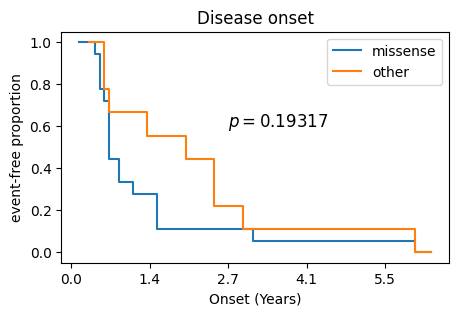

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

onset_fig, ax = plt.subplots(figsize=(5, 3))
missense_onset_result.plot_kaplan_meier_curves(ax=ax)
def days_to_years(x, pos):
    return f"{x / 365.25:.1f}"


ax.xaxis.set_major_formatter(FuncFormatter(days_to_years))
ax.set_xlabel("Onset (Years)")
ax.set_ylabel("event-free proportion")
ax.set_title("Disease onset")
s = f"p={missense_onset_result.pval:.5f}"
ax.text(x=1000, y=0.6, s=f"${s}$", fontsize=12)

# Summary

In [14]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport


m_results = (
    GPAnalysisResultSummary.from_mono(
        result=missense_onset_result
    ),
)

f_results =  (
    GPAnalysisResultSummary.from_multi(
        result=nterm_result,
    ), 
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ), 
)

report = GpseaAnalysisReport(
    name=gene_symbol,
    cohort=cohort,
   mono_results=m_results,
    fet_results=f_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
)

In [15]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [25]:
summarizer.process_latex(report=report, protein_fig=ATP6V0C_fig, stats_fig=onset_fig)

Figure saved to ../../supplement/img/ATP6V0C_protein_diagram-draft.pdf
Figure saved to ../../supplement/img/ATP6V0C_stats-draft.pdf
Output to ../../supplement/tex/ATP6V0C_summary_draft.tex
